In [2]:
import pandas as pd
data = pd.read_csv('/Users/yena/Desktop/SCH/척척석사/연구 진행 및 분석 코드/약물전체추가/1.5/FINAL_약물전체추가(1:1.5).csv')
data = data.drop(columns=['등록번호'])
data.head()

,MFS,total_cci,키,몸무게,성별,나이,"ADL_배뇨, 배변",ADL_체위변경,ADL_침상 밖으로 이동,ADL_식사섭취,...,Cluster_O,Cluster_P,Cluster_Q,Cluster_R,Cluster_S,Cluster_T,Cluster_U,ADL_전문,ADL_위험,욕창_기동력
0,50.0,0.0,185.3,110.3,0,28.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50.0,1.8,185.3,101.8,0,35.9,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,52.0,0.0,171.0,101.0,0,31.0,2,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,60.0,1.0,179.0,98.4,0,44.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,70.0,0.0,169.1,97.0,0,44.9,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
import os
import pandas as pd
import numpy as np
import sys
import openpyxl

from datetime import datetime
import datetime
from datetime import timedelta

from tqdm import tqdm

import matplotlib

#시각화
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from matplotlib import font_manager, rc
rc('font',family="AppleGothic")
plt.rcParams["font.family"]="AppleGothic" #plt 한글꺠짐
plt.rcParams["font.family"]="Arial" #외국어꺠짐
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정
plt.rc('figure', figsize=(15,8))

sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid') #sns 한글깨짐
#그래프 세팅
font = {'family': 'serif',
        'color':  'white',
        'weight': 'normal',
        'size': 16,
        }

#마이너스 폰트
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
#판다스 컬럼 다보기
pd.set_option('display.max_columns', 100)

#시각화?
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
#elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    #plt.rc('font', family='Malgun Gothic')



# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [4]:
import graphviz 
import multiprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

In [5]:
x = data.drop(columns=['낙상유무'])
y = data['낙상유무']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

In [6]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=10)
model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)

# predict probabilities
probs = model.predict_proba(x_test)

#keep probabilities for the positive outcome only
probs = probs[:,1]

In [7]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('accuracy_score : ', accuracy_score(y_test, y_test_pred))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

dt_precision, dt_recall, _ = precision_recall_curve(y_test, probs)
dt_f1, dt_auc = f1_score(y_test, y_test_pred), auc(dt_recall, dt_precision)

# summarize scores
print('DT: f1 = %.3f auc = %.3f' % (dt_f1, dt_auc))

accuracy_score :  0.875
DT: f1 = 0.889 auc = 0.925


In [8]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

print('tn, fp, fn, tp = ', tn, fp, fn, tp)


recall = tp/(tp + fn) # 민감도 또는 재현율
specificity = tn/(tn + fp) # 특이도
precision = tp/(tp+fp) # 정밀도, 양성예측도
minus = tn/(fn+tn)  # 음성예측도

print('양성예측도 = ', precision)
print('음성예측도 = ' ,minus)
print('민감도 = ', recall)
print('특이도 = ' ,specificity)

tn, fp, fn, tp =  84 12 16 112
양성예측도 =  0.9032258064516129
음성예측도 =  0.84
민감도 =  0.875
특이도 =  0.875


In [9]:
from sklearn.model_selection import cross_val_score

def display_score(score):
    print('Score : ', score)
    print('Mean : ', score.mean())
    print('StandardDeviation : ' ,score.std())
    
    
cross_val = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=10)
display_score(cross_val)

Score :  [0.94339623 0.90384615 0.80769231 0.88461538 0.94230769 0.88461538
 0.84615385 0.86538462 0.92307692 0.80769231]
Mean :  0.8808780841799709
StandardDeviation :  0.04709188885869752


In [10]:
from sklearn.model_selection import cross_val_score

def display_score(score):
    print('Score : ', score)
    print('Mean : ', score.mean())
    print('StandardDeviation : ' ,score.std())
    
    
cross_val = cross_val_score(model, x_train, y_train, scoring='f1', cv=10)
display_score(cross_val)

Score :  [0.95384615 0.91803279 0.84848485 0.9        0.95081967 0.91176471
 0.88235294 0.89230769 0.9375     0.84375   ]
Mean :  0.903885880071391
StandardDeviation :  0.03659146081530346


In [11]:
from sklearn.model_selection import cross_val_score

def display_score(score):
    print('Score : ', score)
    print('Mean : ', score.mean())
    print('StandardDeviation : ' ,score.std())
    
    
cross_val = cross_val_score(model, x_train, y_train, scoring='roc_auc', cv=10)
display_score(cross_val)

Score :  [0.93675595 0.90399386 0.7875     0.896875   0.953125   0.859375
 0.81875    0.853125   0.91875    0.796875  ]
Mean :  0.8725124807987712
StandardDeviation :  0.055439283837960256


/Users/yena/miniforge3/envs/python_study_3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


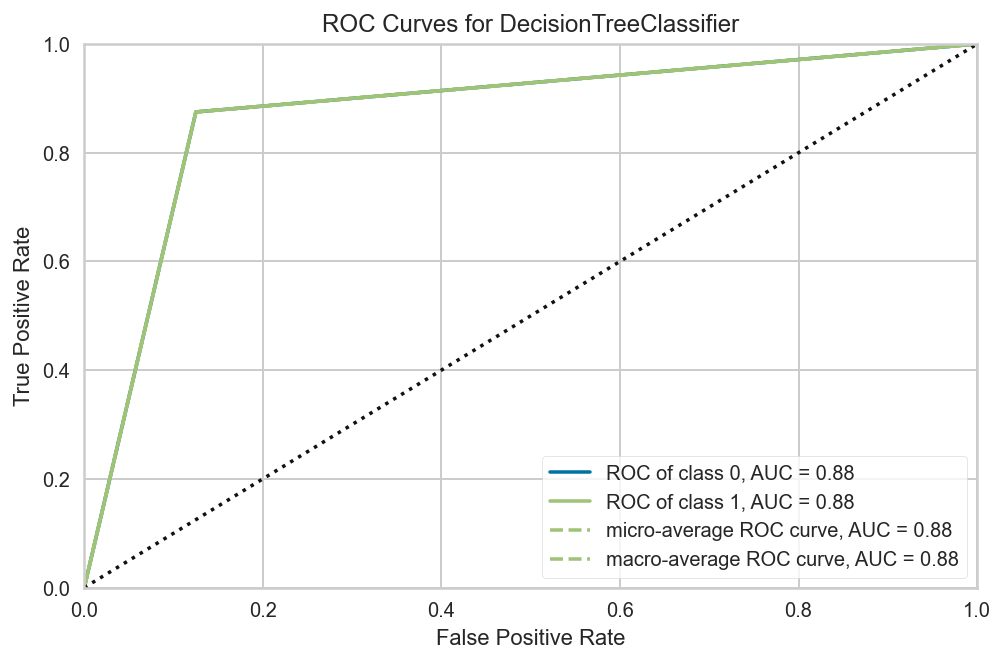

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [12]:
from yellowbrick.classifier import ROCAUC

plt.rc('figure', figsize=(8,5))

visualizer = ROCAUC(model, classes=[0,1])
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

In [13]:
weight = model.feature_importances_
weight

weight2 = []

for i in range(0,len(x_train.columns)):
    weight2.append(weight[i])

#weight이 값을 시리즈에 저장
coeff = pd.Series(data= weight2 , index= x_train.columns)
sorted_values =  coeff.sort_values(ascending=False)    #coeff 를 내림차순으로 정렬해주세요
sorted_values

욕창_행동               0.505325
total_cci           0.051328
나이                  0.040644
Cluster_L           0.039483
Cluster_F           0.033725
욕창_영양               0.029788
Cluster_A           0.028145
Cluster_G           0.024009
Cluster_C           0.022774
통증강도                0.022156
Cluster_H           0.022115
키                   0.021996
MFS                 0.021643
Cluster_D           0.019568
몸무게                 0.019387
Cluster_S           0.019012
Cluster_M           0.013499
ADL_체위변경            0.013251
욕창_기동력              0.009933
Cluster_P           0.007921
ADL_위험              0.007814
Cluster_B           0.007277
Cluster_I           0.006468
ADL_배뇨, 배변          0.005390
성별                  0.004043
ADL_침상 밖으로 이동       0.003308
Cluster_E           0.000000
Cluster_R           0.000000
ADL_전문              0.000000
Cluster_U           0.000000
Cluster_T           0.000000
Cluster_O           0.000000
Cluster_Q           0.000000
Cluster_N           0.000000
ADL_식사섭취      

In [14]:
import eli5
from eli5.sklearn import PermutationImportance

# perm = PermutationImportance(model, random_state=10).fit(x_train, y_train)
eli5.show_weights(model, top=len(x_train.columns), feature_names=x_test.columns.tolist())


Weight,Feature
0.5053,욕창_행동
0.0513,total_cci
0.0406,나이
0.0395,Cluster_L
0.0337,Cluster_F
0.0298,욕창_영양
0.0281,Cluster_A
0.0240,Cluster_G
0.0228,Cluster_C
0.0222,통증강도


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MFS               745 non-null    float64
 1   total_cci         745 non-null    float64
 2   키                 745 non-null    float64
 3   몸무게               745 non-null    float64
 4   성별                745 non-null    int64  
 5   나이                745 non-null    float64
 6   ADL_배뇨, 배변        745 non-null    int64  
 7   ADL_체위변경          745 non-null    int64  
 8   ADL_침상 밖으로 이동     745 non-null    int64  
 9   ADL_식사섭취          745 non-null    int64  
 10  호흡 간호_비침습적 산소 투여  745 non-null    int64  
 11  통증강도              745 non-null    float64
 12  욕창_행동             745 non-null    int64  
 13  욕창_영양             745 non-null    int64  
 14  낙상유무              745 non-null    int64  
 15  Cluster_A         745 non-null    float64
 16  Cluster_B         745 non-null    float64
 1